# Coursework TensorFlow
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [392]:
NAME = "21189095"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [TensorFlow](https://www.tensorflow.org/)
- [TensorFlow DataSets](https://www.tensorflow.org/datasets)

---

Notes for people running the notebook in Google Colab:

- This notebook uses quite a bit of RAM (the solutions run with ~8.5Gb of RAM), which means that if you are very inefficient in your memory usage, it will not fit within Colab's limits of 12Gb. If this is the case, you can try restarting the runtime to free up memory of variables you have created and that you no longer use or write your code in a more efficient way.
- You can enable a Runtime with GPU acceleration for faster training (Runtime -> Change runtime type)

In [393]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [394]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

# Part 1: Data pre-processing


In these exercises we will look at the classification of flowers into 5 different classes using convolutional neural networks (CNNs). The implementation of this will be done using TensorFlow (TF).

The dataset can be loaded in using the [Tensorflow Datasets](https://www.tensorflow.org/datasets) package. Below you see how we load in the data and change it from a TF generator object into a list of the images and a list of the targets. 

In [395]:
# Load data
data = tfds.load('tf_flowers', split=["train"], as_supervised=True)

In [396]:
images, targets = zip(*[i for i in data[0]])
labels = ["dandelion", "daisy", "tulips",  "sunflowers", "roses"]

_Plot the first two images and their classes by writing a function `show_image`. Set the title of the images to be the class (use the actual label, not the number) it belongs to._ 

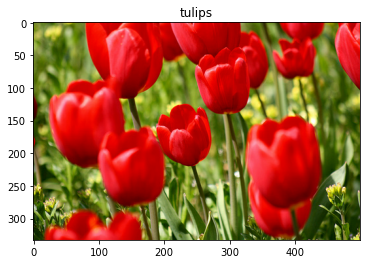

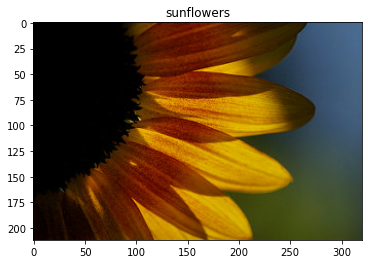

In [397]:
def show_image(image, target):
    # YOUR CODE HERE
    # raise NotImplementedError()
    plt.figure()
    plt.imshow(image)
    plt.title(labels[target])
    plt.show()
    return

for i in range(2):
    show_image(images[i], targets[i])

Before we can use the data to train neural networks, we need to pre-process the data such that:
    
- the images are all the same shape (224,224)
- the images, originally with values (0, 255), are mapped to have values between (0, 1)
- the labels are represented as one-hot vectors

_Write a function to rescale and resize the images._

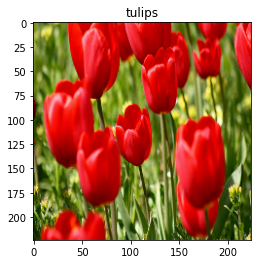

In [398]:
def rescale_and_resize(image):
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    # mapped to have values between (0,1)
    # print(image.dtype) 
    # image inputs are in 'unit8'
    image = tf.cast(image, tf.float32) / 255.0
    # the images are all the same shape (224,224)
    preprocessed_image = tf.image.resize(image,[224,224])
    return preprocessed_image

show_image(rescale_and_resize(images[0]), targets[0])

In [399]:
check_var_defined('rescale_and_resize')

rescale_and_resize defined.


_Now use the function to pre-process the data in the variable `images` and save the preprocessed images in an np.ndarray `images_preprocessed`._

In [400]:
# YOUR CODE HERE
# raise NotImplementedError()

# store rescale and resize image inputs into image_preprocessed
images_preprocessed = []
for i in range(len(images)):
    preprocessed_dataset = rescale_and_resize(images[i]).numpy()
    images_preprocessed.append(preprocessed_dataset)
images_preprocessed = np.array(images_preprocessed)
# print(images_preprocessed.shape)

In [401]:
check_var_defined('images_preprocessed')
assert type(images_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

images_preprocessed defined.


One approach to represent the image labels so that they can be trainable by a neural network is to represented them as a one-hot vector. 

_Write a function `one_hot_encoding` that takes the integer label and returns a one-hot vector of the label._

In [402]:
def one_hot_encoding(target):
    # YOUR CODE HERE
    # raise NotImplementedError()

    labels_dict = {label: index for index, label in enumerate(np.unique(labels))}
    labels_codes = np.array([labels_dict[label] for label in labels_dict])

    # Create an identity matrix with the number of rows equal to the number of labels
    identity_matrix = np.eye(len(labels_dict))
    one_hot_encoded = identity_matrix[labels_codes]
    one_hot_vector = one_hot_encoded[target]
    
    return one_hot_vector

print(f"target: {targets[0]}, encoding: {one_hot_encoding(targets[0])}")

target: 2, encoding: [0. 0. 1. 0. 0.]


_Now use the function `one_hot_encoding` to create an np.ndarray of the one-hot representations of all the labels in `targets` and save them in `targets_preprocessed`._

In [403]:
# YOUR CODE HERE
# raise NotImplementedError()

# similar as above, store one hot vector inputs into targets preprocessed
targets_preprocessed = []
for i in range(len(targets)):
    target = one_hot_encoding(targets[i])
    targets_preprocessed.append(target)
targets_preprocessed = np.array(targets_preprocessed)


In [404]:
check_var_defined('targets_preprocessed')
assert type(targets_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

targets_preprocessed defined.


In this notebook you will train different models and compare them against each other. 

Now that the data is pre-processed. We will split the data in three datasets, a train, validation and test set. 

_Why do we need these three sets and what do we use them for._

YOUR ANSWER HERE

First of all, in machine learning, we use data to train our models to learn patterns and relationships between the input features and output labels. Therefore, it's important to build our model with different data sets, which should use to train the model and understand how well it can generalize to new and unseen inputs. This is why the need for train, validation, and test data sets.

The train set is used to fit the model, the validation set is used to adjust hyperparameters (tune the model to avoid overfitting or underfitting), and the test set is used to evaluate the final performance of the model.

_Now split the data such that we have a train set with 80\% of the samples and a validation and test set each with 10\% of the samples. Save the results in `x_train`, `y_train`, `x_val`, `y_val`, `x_test`, and `y_test`._

In [405]:
tf.keras.utils.set_random_seed(371947)
# YOUR CODE HERE
# raise NotImplementedError()

X = images_preprocessed
y = targets_preprocessed

# shuffle the indices first
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# split 80% train 10% val and 10% test
train_split = int(0.8 * X.shape[0])
val_split = int(0.9 * X.shape[0])

x_train = X[:train_split]
y_train = y[:train_split]
x_val = X[train_split:val_split]
y_val = y[train_split:val_split]
x_test = X[val_split:]
y_test = y[val_split:]

print(f"Train samples: {len(x_train)}, Validation samples: {len(x_test)}, Test samples: {len(x_val)}")

Train samples: 2936, Validation samples: 367, Test samples: 367


In [406]:
check_var_defined('x_train')
check_var_defined('y_train')

check_var_defined('x_val')
check_var_defined('y_val')

check_var_defined('x_test')
check_var_defined('y_test')

x_train defined.
y_train defined.
x_val defined.
y_val defined.
x_test defined.
y_test defined.


WARNING: Before we continue we delete the variable `images_preprocessed` (you don't need that anymore) to manage our RAM consumption. If you want to use that variable again you will have to rerun the cell that creates it.

In [407]:
# Freeing up RAM by deleting this variable
del images_preprocessed

# Part 2: Training a basic CNN model 

Now that we have pre-processed the data and split it into different parts for training, validation and testing, you can start training some neural networks. 

Our model will take as input the $224 \times 224$ rgb (3-channel) images and will give as output a length five vector of which the different elements correspond to the five different classes. 

The model will start with convolutional layers followed by a hidden dense layer and then the final dense layer that gives us our output. 

_What kind of activation function should we use on the convolutional, dense and output layers and why these specific activation functions? (motivate your answers)_

YOUR ANSWER HERE

For the convolutional layers, the activation function I choosed is the Rectified Linear Unit (ReLU), which has the form $f(x) = \max(0, x)$. ReLU behaves much better than the sigmoid in deep networks since it does not saturate for positive values, and is computationally efficient and helps to introduce non-linearity to the model by allowing the network to learn more complex features. In this case, we don't have negative inputs, so the ReLU will not suffer from the dying neuron problem.

Due to the benefit we discussed above about ReLU, we can also use ReLU activation function for the hidden dense layer, it has been shown to work well in hidden layers of neural networks.

For the output layer, the choice of activation function should depend on the type of problem we are trying to solve. For a multi-class classification problem like this one, we choose to use the Softmax activation function. Softmax function maps the output of the model to a probability distribution over the different classes. The Softmax activation function ensures that the output values are between 0 and 1 and that they sum up to 1, which makes it perfectly suitable for multi-class classification problems.


_Create a model using the `tf.keras.models.Sequential()` model and add to that:_

- Input layer: A 2D convolutional layer with 8 filters, a 3x3 kernel and the ReLU activation function. Specify that this layer has an `input_shape` of (224, 224, 3)_ 
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 16 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A Flatten layer to flatten the filters to a single vector
- A Dense layer with 32 nodes and your chosen activation

- Output layer: A Dense layer with 5 nodes and your chosen activation

_Store the model in the variable `model_basic`._

In [408]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(93612)

# YOUR CODE HERE
# raise NotImplementedError()
# padding won't help with overfitting problem, that's the reason I didn't use it here and in part 3 to save the time
model_basic = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [409]:
check_var_defined('model_basic')

model_basic defined.


To compile the model we need to specify a loss function. 

_What loss function would be appropriate for this multi-class classfication problem?_

_Also, during training we would like to monitor how well our model performs on predicting the targets. What would be a good metric to track? Motivate your answers._ 

YOUR ANSWER HERE

The loss function would be appropriate for this multi-class classfication problem is "categorical_crossentropy". This is because it's designed to compare the predicted probability distribution across all classes with the true probability distribution. The categorical cross-entropy loss function is calculated as the sum of the negative logarithm of the predicted probability for the correct class. And "categorical_crossentropy" is used when the labels are encoded as one-hot vectors, where each label is represented as a vector of length equal to the number of classes, with a value of 1 at the index corresponding to the class label, and 0s elsewhere, which make it become a perfect choice compared with "sparse_categorical_crossentropy".

The metric I would use is "accuracy". To best monitor the performance of the model during training, this metric is a popular choice when dealing with multi_class classification (which we get 5 in this case). Besides it is easy to interpret, also accuracy is a single scalar value that ranges from 0 to 1, which is easy to track the progress of the model during training (including plot the model's performance during training), and it can be easy to use to compare with different models.

Now compile the model using the `Adam` optimiser, your chosen loss, and your chosen metric to track. (Tip: TF has some loss function and metrics implemented in [tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).)

In [410]:
# YOUR CODE HERE
# raise NotImplementedError()
model_basic.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [411]:
check_var_defined('model_basic')

model_basic defined.


_Now fit the train data for 10 epochs and save the training history in the variable `history_basic`. Also specify the `validation_data` and a `batch_size` of 32._

In [412]:
tf.keras.utils.set_random_seed(47290)
# YOUR CODE HERE
# raise NotImplementedError()
history_basic = model_basic.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))



Epoch 1/10
92/92 [==============================] - 41s 440ms/step - loss: 1.3728 - accuracy: 0.4135 - val_loss: 1.1483 - val_accuracy: 0.5014
Epoch 2/10
92/92 [==============================] - 37s 406ms/step - loss: 1.1021 - accuracy: 0.5327 - val_loss: 1.0172 - val_accuracy: 0.5586
Epoch 3/10
92/92 [==============================] - 37s 407ms/step - loss: 0.9999 - accuracy: 0.5947 - val_loss: 0.9263 - val_accuracy: 0.6349
Epoch 4/10
92/92 [==============================] - 36s 389ms/step - loss: 0.9055 - accuracy: 0.6468 - val_loss: 0.9910 - val_accuracy: 0.5940
Epoch 5/10
92/92 [==============================] - 35s 379ms/step - loss: 0.8444 - accuracy: 0.6669 - val_loss: 0.8533 - val_accuracy: 0.6540
Epoch 6/10
92/92 [==============================] - 35s 383ms/step - loss: 0.7567 - accuracy: 0.7112 - val_loss: 0.9345 - val_accuracy: 0.6948
Epoch 7/10
92/92 [==============================] - 35s 382ms/step - loss: 0.6924 - accuracy: 0.7374 - val_loss: 0.9310 - val_accuracy: 0.6757

In [413]:
check_var_defined('history_basic')

history_basic defined.


_Now to see how the model performs, write a function `plot_metrics` that plots the loss for the train and validation set. In the same function also create a separate plot that plots the other metric for the train and validation set._

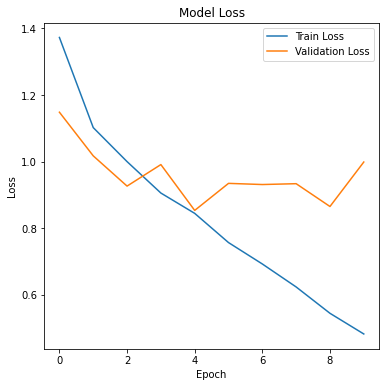

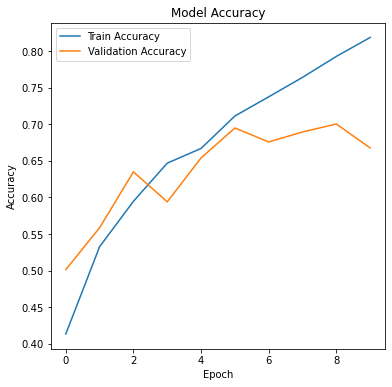

In [414]:
# print(x_train.shape)
def plot_metrics(history):
    # YOUR CODE HERE
    # raise NotImplementedError()
    # Plot loss for the train and validation set
    plt.figure(figsize=(6,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Plot accuracy for the train and validation set
    plt.figure(figsize=(6,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
plot_metrics(history_basic)

_Comment on the performance of the model based the tracked loss and metric_

YOUR ANSWER HERE

From the tracked loss plot, we can observe that the loss decreases dramatically from 1.3728 to 0.4821. It looks like the model is improving a lot with the training data, and it may be able to achieve a good performance. However, the validation loss is fluctuating after the 4 or 5 epochs, and it stay above train loss after epoch 2, which could be the indecator to show that the model may be overfitting to train data. This means that the model is fitting too closely to the training data and may not be able to generalize well to new data.

We generally want to see the metric increase over time for both the training and validation set. And in this time, the metric for the validation set starts to plateau after 5 epochs, but the metric for the training set increases from the first to the end from 0.4135 to 0.8185 (which looks like a really good performance). However, the validation metric is consistently lower than the training metric after 3 epochs training, it could because of the model is overfitting the training data.

*What happens if we were to train the model for more epochs? What will happen to the performance of the model?*

YOUR ANSWER HERE

If we train the model for more epochs, the model will continue to try to fit the training data and improve its performance on the training set. However, as the model is likely underfitting, so training for more epochs is unlikely to improve its performance significantly. In fact, there is a risk that training for too long on an underfitting model could cause it to overfit to the training data, which would result in poor performance on the validation set.

*Write a function `model_predict` that takes the model and some image data and returns the predicted targets (as integers corresponding to the predicted labels).* 

In [415]:
def model_predict(model, x):
    # YOUR CODE HERE
    # raise NotImplementedError()    
    # Use the model to make predictions
    preds = model.predict(x)
    # Convert the predictions to integer labels
    predicted_targets = np.argmax(preds, axis=1)
    return predicted_targets

_Gather the targets of the test set (scalar integer value corresponding to the labels) and save them in `test_targets`._

_Compute the targets for `model_basic` and store them in the variable `test_targets_basic`._

In [416]:
# YOUR CODE HERE
# raise NotImplementedError()
test_targets = np.argmax(y_test, axis=1)
# print(test_targets,y_test)
test_targets_basic = model_predict(model_basic, x_test)
# print(test_targets.shape, test_targets_basic)

12/12 [==============================] - 1s 65ms/step


In [417]:
check_var_defined('test_targets')
check_var_defined('test_targets_basic')

assert test_targets.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"
assert test_targets_basic.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"

test_targets defined.
test_targets_basic defined.


_Calculate the precision and recall averaged over the 5 classes. (Precision and recall for each classes and then avaraged in one score)_

In [418]:
def average_recall_precision(y, y_predict):
    # YOUR CODE HERE
    # raise NotImplementedError()
    precision = []
    recall = []
    for i in range(5):
        tp = np.sum((y == i) & (y_predict == i))
        fp = np.sum((y != i) & (y_predict == i))
        fn = np.sum((y == i) & (y_predict != i))
        p = tp / (tp + fp) if tp + fp > 0 else 0
        r = tp / (tp + fn) if tp + fn > 0 else 0
        precision.append(p)
        recall.append(r)

    print(f"Average Recall: {np.average(recall):.3f}, Average Precision {np.average(precision):0.3f}")

    return np.average(precision), np.average(recall)


recall_basic, precision_basic= average_recall_precision(test_targets, test_targets_basic)

Average Recall: 0.645, Average Precision 0.669


In [419]:
check_var_defined('recall_basic')
check_var_defined('precision_basic')

recall_basic defined.
precision_basic defined.


_Show the predicted targets in a confusion matrix. Show the predicted labels in percentages (percentage of the samples from true class labeled as predicted class) and add the labels to the axes._

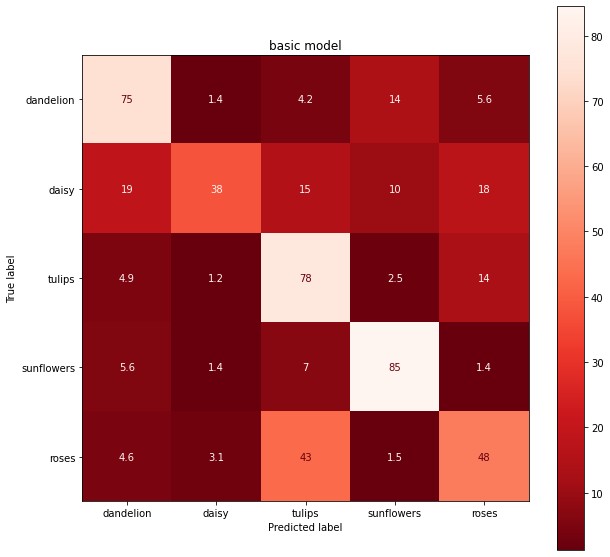

In [420]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y, y_pred, title=""):
    # YOUR CODE HERE
    # raise NotImplementedError()

    # Compute confusion matrix
    con_matrix = confusion_matrix(y, y_pred)
    
    # Compute percentage of true labels predicted as each class
    perc_con_matrix = (con_matrix.T / np.sum(con_matrix, axis=1)).T * 100
    # print(con_matrix,np.sum(con_matrix, axis=1))

    # Create matrix with percentages sign
    text_matrix = []
    for i in range(perc_con_matrix.shape[0]):
        text_row = []
        for j in range(perc_con_matrix.shape[1]):
            text_row.append(f"{perc_con_matrix[i, j]:.1f}%")
        text_matrix.append(text_row)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=perc_con_matrix, display_labels=labels)
    # disp.text_ = text_matrix
    fig, ax = plt.subplots(figsize=(10,10))    
    disp.plot(cmap=plt.cm.Reds_r, ax=ax)    
    plt.title(title)
    plt.show()

plot_confusion_matrix(test_targets, test_targets_basic, "basic model")

_Comment on the recall and precision of the model, as well as the predictions in the confusion matrix._

YOUR ANSWER HERE

The average recall of 0.645 means that on average, the model is able to correctly identify 64.5% of all positive samples. This is a good indication that the model is able to correctly classify the majority of positive samples. The average precision of 0.669 means that on average, when the model predicts a sample as positive, it is correct 66.9% of the time. This is an important metric in tasks where it is important to minimize false positives, as incorrectly classifying a negative sample as positive can have severe consequences. Generally speaking, the average recall and precision are over 50%, so it's not a really bad performance.

According to the percentage from the confusion matrix, we can observe that among all classes, most part of the predicted label results in each class predicts to true label. However, only 48% of predicted roses labels are true, and there are 43% of true labels with roses are predicted to tulips. And the daisy has the lowest accuracy rate, only 38% of predicted labels are true.

# Part 3: Improving the model

To improve on the model we will include some Dropout layers. 

_What do dropout layers do and why might this increase the performance of our models?_

YOUR ANSWER HERE

Dropout is a very popular and effective regularization technique used in neural networks to prevent overfitting. During training, dropout involves simply dropping each neuron for a given training set with probability $p$. By randomly dropping out neurons, dropout layers prevent the neurons from co-adapting too much and relying too heavily on each other. This encourages each neuron to to be as effective as possible individually and not to rely heavily on a few nearby neurons but to consider all input neurons carefully, which can improve the performance of the model on new data.

As we indecated above that the model might get overfitting after epochs 4 or 5, then the technique will defintly prevent this and improve the performance of the model.

Another method to improve the model is by using a technique called data augmentation. 

_Explain the concept data augmentation and explain how it might increase the performance of our model._

YOUR ANSWER HERE

Data augmentation is a technique used to increase the size of the training dataset by creating new, slightly modified versions of the original data. This is achieved by applying a set of transformations to the images, such as rotation, scaling, flipping, cropping, or changing brightness and contrast. By increasing the size of the training dataset, data augmentation can reduce overfitting by exposing the model to a wider variety of images, and prevent the model from memorizing the training data. And data augmentation can help the model learn more robust and invariant features by introducing variations that reflect real-world scenarios. 
In this case, it will precent the model get overfitting. Besides that, the data augentation can also help to generate more samples of underrepresented classes (like 'daisy' and 'roses') to improve the performance of the model on these classes.


_Use the exact same model as for the `model_basic`, but play around with adding in a data augmentation layer (e.g. [tf.keras.layers.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) ) and adding in dropout layers (dropout is typically only added in the dense part of the network). Store the new model in the variable `model_dropout` and compile it using the same metrics and loss as before._

In [421]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(48263)

# YOUR CODE HERE
# raise NotImplementedError()

model_dropout = tf.keras.models.Sequential([
    # Data augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    # typically we set p to 0.5
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model_dropout.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [422]:
check_var_defined('model_dropout')

model_dropout defined.


_Fit the new model in the same way as before and save the history in `history_dropout`. However, train for 20 epochs instead of 10._

In [423]:
tf.keras.utils.set_random_seed(103745)
# YOUR CODE HERE
# raise NotImplementedError()
history_dropout = model_dropout.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val,y_val))


Epoch 1/20
92/92 [==============================] - 36s 381ms/step - loss: 1.5705 - accuracy: 0.2749 - val_loss: 1.3805 - val_accuracy: 0.3842
Epoch 2/20
92/92 [==============================] - 34s 365ms/step - loss: 1.4330 - accuracy: 0.3764 - val_loss: 1.2925 - val_accuracy: 0.3924
Epoch 3/20
92/92 [==============================] - 35s 378ms/step - loss: 1.3593 - accuracy: 0.4108 - val_loss: 1.1824 - val_accuracy: 0.5504
Epoch 4/20
92/92 [==============================] - 34s 370ms/step - loss: 1.2340 - accuracy: 0.4768 - val_loss: 1.0330 - val_accuracy: 0.5967
Epoch 5/20
92/92 [==============================] - 35s 382ms/step - loss: 1.1689 - accuracy: 0.5194 - val_loss: 0.9964 - val_accuracy: 0.6240
Epoch 6/20
92/92 [==============================] - 36s 387ms/step - loss: 1.1283 - accuracy: 0.5385 - val_loss: 0.8831 - val_accuracy: 0.6267
Epoch 7/20
92/92 [==============================] - 34s 370ms/step - loss: 1.0874 - accuracy: 0.5623 - val_loss: 0.8996 - val_accuracy: 0.6403

In [424]:
check_var_defined('history_dropout')

history_dropout defined.


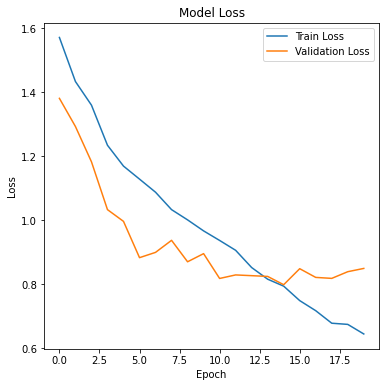

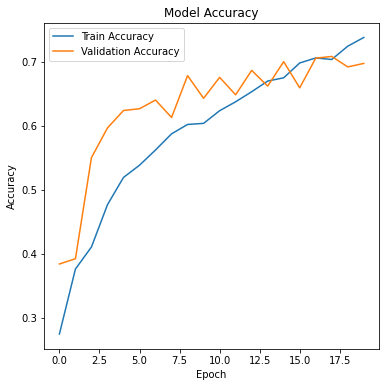

In [425]:
plot_metrics(history_dropout)

_Comment on the performance of the improved model based on the loss and metrics during training._

YOUR ANSWER HERE

From the tracked loss plot, we can observe that the loss decreases dramatically from 1.5705 to 0.6448. It looks like the model is well improved a lot with the training data. The validation loss is fluctuating around 0.8 after the 10, and it stay above train loss after epoch near 15, which could be the indecator to show that the model may be overfitting after epoch 15 to train data. But it still improved a lot compared with last one.

The metric generally increase over time for both the training and validation set. And in this case, the metric for the training set increases from the first to the end from 0.2749 to 0.7381 (which looks like a really good performance). Besides that, the metric for the validation set starts to fluctuate up and down with slightly genreally increase after near 8 epochs (it actually increase from 0.3842 to 0.6975). Even though after near 17 epochs it gets above of the training set line which could be the sign of overfitting, but it still improves a lot than the last one.

_Why did we have to train the model for longer than the basic model?_

YOUR ANSWER HERE

The reason why we have to train the model for longer than the basic model is because that the dropout layers introduce more randomness and variation in the trainning data (which can tell by the initial loss and accuracy compared with the last one). This means that the model may take longer to converge and find the optimal weights for the training data. Additionally, by increasing the complexity of the model with more layers, the model may require more epochs to fully train and achieve optimal performance.

Now we evaluate our model on the test set using the functions you wrote before

12/12 [==============================] - 1s 66ms/step
Average Recall: 0.669, Average Precision 0.685


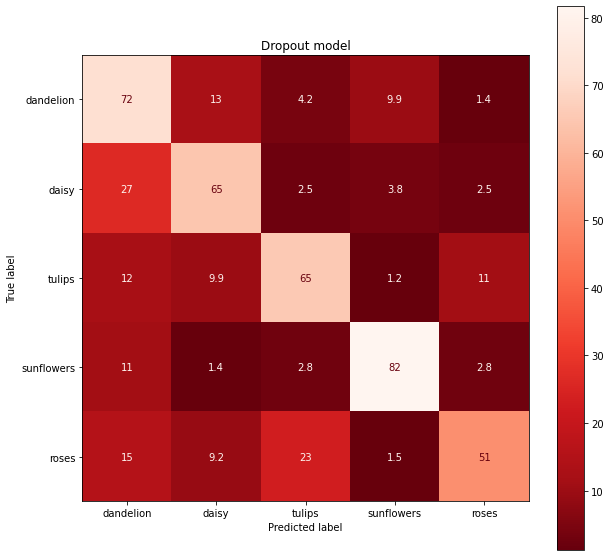

In [426]:
test_targets_dropout = model_predict(model_dropout, x_test)
recall_dropout, precision_dropout = average_recall_precision(test_targets, test_targets_dropout)    
plot_confusion_matrix(test_targets, test_targets_dropout, "Dropout model")

In [427]:
check_var_defined('test_targets_dropout')
check_var_defined('recall_dropout')

test_targets_dropout defined.
recall_dropout defined.


In [428]:
check_var_defined('test_targets_dropout')
check_var_defined('precision_dropout')

test_targets_dropout defined.
precision_dropout defined.


_Comment on the precision and recall of the model as well as the predictions in the confusion matrix_

YOUR ANSWER HERE

The average recall of 0.669 means that on average, the model is able to correctly identify 66.9% of all positive samples. This is a good indication that the model is able to correctly classify the majority of positive samples. The average precision of 0.685 means that on average, when the model predicts a sample as positive, it is correct 68.5% of the time. This is an important metric in tasks where it is important to minimize false positives, as incorrectly classifying a negative sample as positive can have severe consequences. Compared with the last unimproved model, both two indecators get increased, the improvement is worked really well.

According to the percentage from the confusion matrix, we can observe that among all classes, the most part of the predicted label results in each class predicts to true label. And, the percentage of predicted true roses labels is increased from 48% to 51%. Moreover, the daisy has 65% accuracy rate, which is 27% higher than the last one. This is a huge improvement compared with last one. Overall, the accuracy percentage of predicting right true label for each class is over than 50%, it is well performaned than the last one. 

# Part 4: Transfer learning

In order to improve our model even further, we will make use of transfer learning. 

_Explain in your own words what tranfer learning means and why it would help in our particular case._

YOUR ANSWER HERE

Transfer learning is a technique that involves using a pre-trained CNN model as a starting point for a new model, rather than training a new model from scratch. As the pre-trained model has already learned useful features on the training dataset, so instead of starting with random weights, we can use these pre-trained weights as a starting point. Therefore, we can then find the best performance of the pre-trained model on dataset, which will help to improve the performance of the model and may get rid of overfitting in this case.

Below you can see how we load in a pre-trained MobileNet that is trained on the ImageNet datastet. By not including the top part of the network we get only the convolutional layers and can add our own dense layers after that. We set all the layers of the MobileNet as not trainable, since this would be computationally expensive to do and we also want to avoid overfitting. Instead we will only be training the dense part. 

In [429]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False, 
    weights='imagenet'
)

for layer in mobilenet.layers:
   layer.trainable = False

print("Output shape of the MobileNet: ", mobilenet.output_shape)

Output shape of the MobileNet:  (None, 7, 7, 1024)


_Use a sequential model and add the MobileNet, followed by a MaxPool2D layer, and then the dense part of the network which you can use the same as we have used in the previous models. Store the model in the variable `model_mobilenet`. Compile the model using the same metrics, loss and optimiser as before._

In [430]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(387453)

# YOUR CODE HERE
# raise NotImplementedError()

# Add layers to the base model
model_mobilenet = tf.keras.Sequential([
    mobilenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [431]:
check_var_defined('model_mobilenet')

model_mobilenet defined.


*Train the model in the same way as before, for 10 epochs.*

In [432]:
tf.keras.utils.set_random_seed(9673)
# YOUR CODE HERE
# raise NotImplementedError()
history_mobilenet = model_mobilenet.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))


Epoch 1/10
92/92 [==============================] - 54s 544ms/step - loss: 1.1529 - accuracy: 0.5780 - precision: 0.6737 - recall: 0.4796 - val_loss: 0.4792 - val_accuracy: 0.8311 - val_precision: 0.9145 - val_recall: 0.7575
Epoch 2/10
92/92 [==============================] - 45s 485ms/step - loss: 0.5966 - accuracy: 0.7827 - precision: 0.8381 - recall: 0.7388 - val_loss: 0.3941 - val_accuracy: 0.8638 - val_precision: 0.9133 - val_recall: 0.8038
Epoch 3/10
92/92 [==============================] - 49s 536ms/step - loss: 0.5174 - accuracy: 0.8110 - precision: 0.8571 - recall: 0.7701 - val_loss: 0.3659 - val_accuracy: 0.8665 - val_precision: 0.9032 - val_recall: 0.8392
Epoch 4/10
92/92 [==============================] - 50s 539ms/step - loss: 0.4549 - accuracy: 0.8331 - precision: 0.8722 - recall: 0.7994 - val_loss: 0.3382 - val_accuracy: 0.8883 - val_precision: 0.9099 - val_recall: 0.8529
Epoch 5/10
92/92 [==============================] - 47s 508ms/step - loss: 0.4203 - accuracy: 0.8495

In [433]:
check_var_defined('history_mobilenet')

history_mobilenet defined.


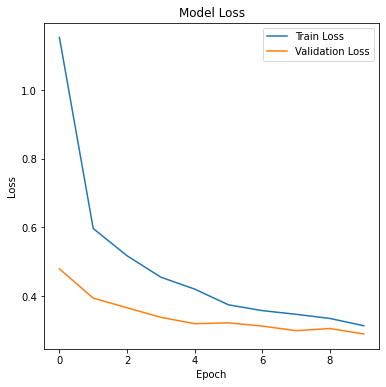

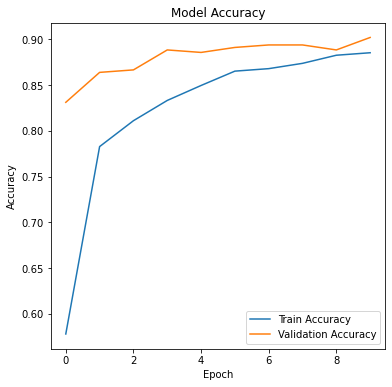

In [434]:
plot_metrics(history_mobilenet)

12/12 [==============================] - 5s 417ms/step
Average Recall: 0.923, Average Precision 0.921


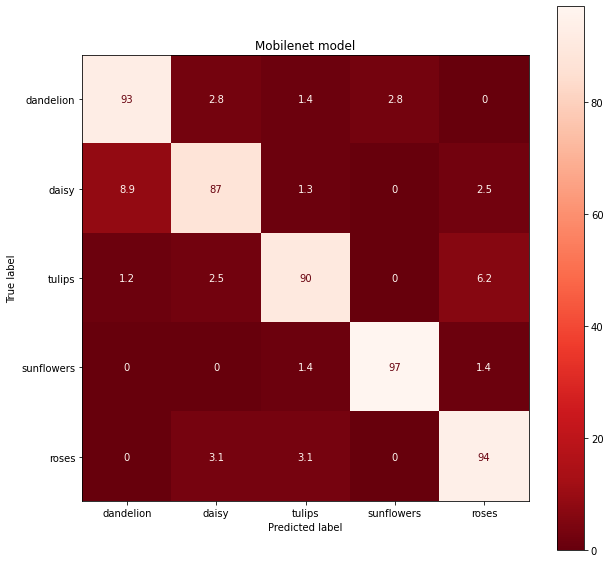

In [435]:
test_targets_mobilenet = model_predict(model_mobilenet, x_test)
recall_mobilenet, precision_mobilenet = average_recall_precision(test_targets, test_targets_mobilenet)    
plot_confusion_matrix(test_targets, test_targets_mobilenet, "Mobilenet model")

In [436]:
check_var_defined('test_targets_mobilenet')
check_var_defined('recall_mobilenet')


test_targets_mobilenet defined.
recall_mobilenet defined.


In [437]:
check_var_defined('precision_mobilenet')


precision_mobilenet defined.


_Comment on the results from the transfer-learned model and why the results differ to the case considered previously without transfer learning._

YOUR ANSWER HERE

The transfer-learned model (model_mobilenet) achieved higher performance than the previous models (model_basic and model_dropout). The average precision and recall of model_mobilenet are both above 0.92, which are significantly better than the previous models (indecators in both previous models without transfer learning are around 0.66). By looking at the 'Loss' and 'Accuracy' plots, the model with transfer learning gets rid of overfitting completely, which improved the performance of medel a lot.

The improved performance of the model with transfer learning is mainly due to the use of the pre-trained CNN model as the convolutional base. And the MobileNet model was trained on a large dataset of images, including many objects and scenes that are also present in the CIFAR-10 dataset. As a result, the MobileNet model has learned to improve recognizing a wide range of image features that are useful for classifying required lables, even for those features are not directly related to the specific objects.

_Suggest some ways the model could be improved further._

YOUR ANSWER HERE

Firstly, as the model now is not overfitting at all, so maybe we can try to train the model with larger epochs to improve the model performance. If we can collect more data, it could lead to better performance (have to avoid underfitting).

Secondly, we can try to unfreeze some of the layers in the MobileNet base model and train them along with the added dense layers to find the highest level of performance of the model to the dataset.

Thirdly, as we can observe in the last model, the 'Dropout' technique didn't have a significant improvement in the model performance. Therefore, we can experiment with different types of data augmentation to see if it can improve performance further.

Fourthly, I believe we can try different CNN model algorithms such as VGG, ResNet, Inception and UNet to see if they can improve the performance of the model better.

At the last, we can always experiment with different hyperparameters (such as learning rates, batch sizes, and epochs) to see if they can improve the performance better.